<a href="https://colab.research.google.com/github/hoangdh1/TrafficSignClassification/blob/main/TrafficSignClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing data

In [ ]:
import tensorflow as tf
tf.version

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>

Mount Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
pwd

'/content'

In [ ]:
cd /content/gdrive/MyDrive/BTL_ML/data


/content/gdrive/.shortcut-targets-by-id/1jtwQ01KKNN4OXDf7MeivMACQRgfTwAWd/BTL_ML/data


In [ ]:
#!git clone https://bitbucket.org/jadslim/german-traffic-signs

In [ ]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


Open data file downloaded.

In [ ]:
import pickle

with open("/content/gdrive/MyDrive/BTL_ML/data/german-traffic-signs/test.p", mode="rb") as f:
  test = pickle.load(f)
with open("/content/gdrive/MyDrive/BTL_ML/data/german-traffic-signs/train.p", mode="rb") as f:
  train = pickle.load(f)
with open("/content/gdrive/MyDrive/BTL_ML/data/german-traffic-signs/valid.p", mode="rb") as f:
  valid = pickle.load(f)

Check data set

In [ ]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
          [ 29,  25,  22]],
 
         [[ 28,  23,  23],
       

In [ ]:
trainX = train["features"]
trainY = train["labels"]

validX = valid["features"]
validY = valid["labels"]

testX = test["features"]
testY = test["labels"]

In [ ]:
trainX.shape

(34799, 32, 32, 3)

In [ ]:
validX.shape

(4410, 32, 32, 3)

In [ ]:
testX.shape

(12630, 32, 32, 3)

Visualize data

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
#Số nhãn
n_classes = len(set(trainY))
n_classes

43

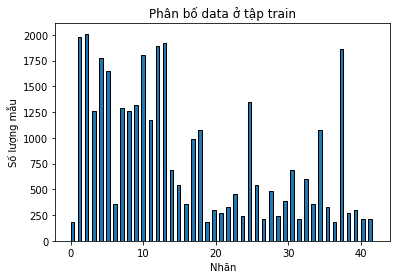

In [ ]:
plt.hist(trainY, bins=n_classes, edgecolor='black', width=0.5)
plt.title('Phân bố data ở tập train')
plt.xlabel('Nhãn')
plt.ylabel('Số lượng mẫu')
plt.show()

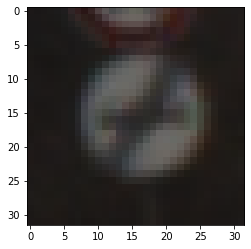

In [ ]:
plt.imshow(trainX[1])

In [ ]:
trainY[1]

41

Như đã thấy ở trên thì labels vẫn là dạng số chưa được đánh nhãn.
Ta cần đánh nhãn cho chúng:

In [ ]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

In [ ]:
classNames[trainY[1]]

'End of no passing'

Ta cần tráo các dữ liệu trong tập train lên để giữ tính tổng quát khi train dữ liệu. Vì dữ liệu ban đầu có các ảnh giống nhau được đặt liền nhau và đã được sắp nhãn theo thứ tự.

In [ ]:
from sklearn.utils import shuffle

trainX, trainY = shuffle(trainX, trainY)

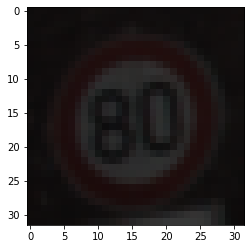

In [ ]:
plt.imshow(trainX[1])

In [ ]:
classNames[trainY[1]]

'Speed limit (80km/h)'

Chuẩn hóa dữ liệu từ các giá trị 0-255 về 0-1 để tăng độ chính xác (giảm độ kéo giãn giữa các điểm dữ liệu)

In [ ]:
trainX = trainX.astype("float")/255.0
validX = validX.astype("float")/255.0
testX = testX.astype("float")/255.0

trainX[0]

array([[[0.8745098 , 0.83137255, 0.84313725],
        [0.97647059, 0.96862745, 0.96862745],
        [1.        , 0.97254902, 0.90980392],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.90980392, 0.81568627, 0.84313725],
        [0.98431373, 0.96470588, 0.96862745],
        [1.        , 1.        , 0.91372549],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.89019608, 0.85882353, 0.8745098 ],
        [0.98039216, 0.97254902, 0.97647059],
        [1.        , 1.        , 0.94901961],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.17254902, 0.43137255, 0.99215686],
        [0.18039216, 0.43921569, 0.99607843],
        [0.18823529, 0

Chuẩn hoá nhãn từ dạng số (0-42) sang dạng onehot tương ứng với vector đầu ra của mạng (43*1)

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
lb = LabelBinarizer()

In [ ]:
trainY = lb.fit_transform(trainY)

In [ ]:
validY = lb.fit_transform(validY)

In [ ]:
testY = lb.fit_transform(testY)

In [ ]:
valid["labels"][0]

41

In [ ]:
validY[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

Tăng cường data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

# Build model

## Xây dựng mô hình CNN (ảnh trên mạng của trang ProtonX)
link: https://drive.google.com/file/d/1q9UfrDgz4EmKMImDwBgzxUIgYjFvMSpZ/view?usp=sharing

### Init model

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout

#Khởi tạo
model = Sequential()

width = 32
height = 32
shape = (width, height, 3)

classes = 43

In [ ]:
#Block 1

model.add(Conv2D(32, (3, 3), padding="same", input_shape=shape))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

#Kiểm tra
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

In [ ]:
#Tiếp tục với Block 2 và Block 3 theo ảnh mô hình mẫu

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

#Kiểm tra
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

In [ ]:
#Duỗi ra dạng vector
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

In [ ]:
#Thu nhỏ dần về 43 lớp như trong mô hình
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

In [ ]:
model.add(Dense(classes))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

In [ ]:
#Cho ra kết quả có xác suất lớn nhất bằng hàm softmax
model.add(Activation("softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

In [ ]:
# learning rate
learning_rate = 0.01

# epochs
epochs = 10

# batch size 
batch_size = 64

Thuật toán để tối ưu hoá loss funtion


In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
opt = SGD(learning_rate=learning_rate, momentum=0.9)

Sau đó compile thuật toán vào model

In [ ]:
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

### Start training


In [ ]:
# H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), 
#                          steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1)

Lưu lại quá trình train


In [ ]:
cd /content/gdrive/MyDrive/BTL_ML/saved_model/model_1

/content/gdrive/.shortcut-targets-by-id/1jtwQ01KKNN4OXDf7MeivMACQRgfTwAWd/BTL_ML/saved_model/model_1


In [ ]:
#model.save("model_1.h5")

Lưu lại history của model sau khi train

In [ ]:
import numpy as np

In [ ]:
#np.save('history_model_1.npy',H.history)

### Plot loss và accurracy

In [ ]:
saved_history_model_1=np.load('history_model_1.npy',allow_pickle='TRUE').item()

Text(0.5, 0, 'epoch')

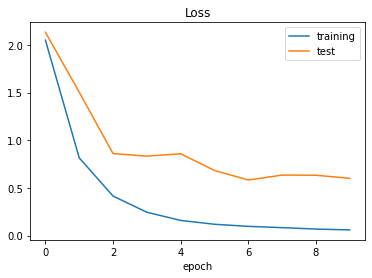

In [ ]:
plt.plot(saved_history_model_1['loss'])
plt.plot(saved_history_model_1['val_loss'])
plt.legend(['training','test'])
plt.title('Loss')
plt.xlabel('epoch')
#plt.savefig('loss.png') 

Text(0.5, 0, 'epoch')

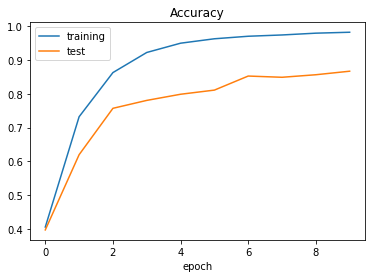

In [ ]:
plt.plot(saved_history_model_1['accuracy'])
plt.plot(saved_history_model_1['val_accuracy'])
plt.legend(['training','test'])
plt.title('Accuracy')
plt.xlabel('epoch')
#plt.savefig('acc.png') 

In [ ]:
saved_model_1 = tf.keras.models.load_model("model_1.h5")

### Evaluation

In [ ]:
score = saved_model_1.evaluate(testX, testY, verbose=1)

395/395 [==============================] - 3s 7ms/step - loss: 0.4634 - accuracy: 0.8854


In [ ]:
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

Test Score: 0.46344640851020813
Test Accuracy: 0.8853523135185242


### Sử dụng model đã train để predict

In [ ]:
predY_hat = saved_model_1.predict(testX)

In [ ]:
predY_hat

array([[3.5693752e-13, 1.3057483e-15, 2.0401131e-13, ..., 2.4900949e-14,
        1.9457363e-12, 3.0828584e-08],
       [7.8041984e-07, 9.9992836e-01, 1.3103374e-07, ..., 1.5085933e-11,
        6.1142366e-08, 2.0447029e-08],
       [2.3194870e-09, 8.8343760e-10, 3.7484067e-06, ..., 3.2362554e-05,
        5.7934274e-10, 4.3904148e-11],
       ...,
       [1.0759571e-05, 5.7426687e-06, 1.0956654e-03, ..., 1.0696894e-05,
        9.3919260e-04, 2.6619530e-03],
       [4.5853003e-08, 9.9051212e-09, 3.6060205e-10, ..., 9.7580232e-07,
        2.5365778e-09, 1.4286954e-08],
       [2.5495906e-11, 1.5624818e-09, 9.7990815e-10, ..., 7.2731887e-10,
        1.9511839e-08, 9.3226674e-08]], dtype=float32)

Trên đây là xác suất của từng class với mỗi ảnh. Ta sẽ chọn xác suất lớn nhất tương ứng với ảnh đầu vào

In [ ]:
predY = np.argmax(predY_hat, axis=1)

In [ ]:
predY

array([16,  1, 38, ..., 20,  7, 10])

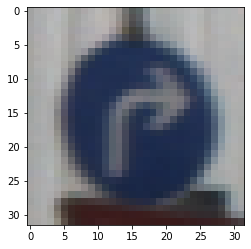

In [ ]:
plt.imshow(test["features"][99])

In [ ]:
classNames[predY[99]]

'Turn right ahead'

### Xây dựng Confusion Matrix

In [ ]:
from sklearn import metrics

In [ ]:
testY_label =  np.argmax(testY, axis=1)

In [ ]:
c_matrix = metrics.confusion_matrix(testY_label, predY)

In [ ]:
import seaborn as sns
import pandas as pd
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
class_names= classNames.values()
class_names

dict_values(['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing for vehicles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles', 'Vehicles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End of no passing by vehicles over 3.5 metric to

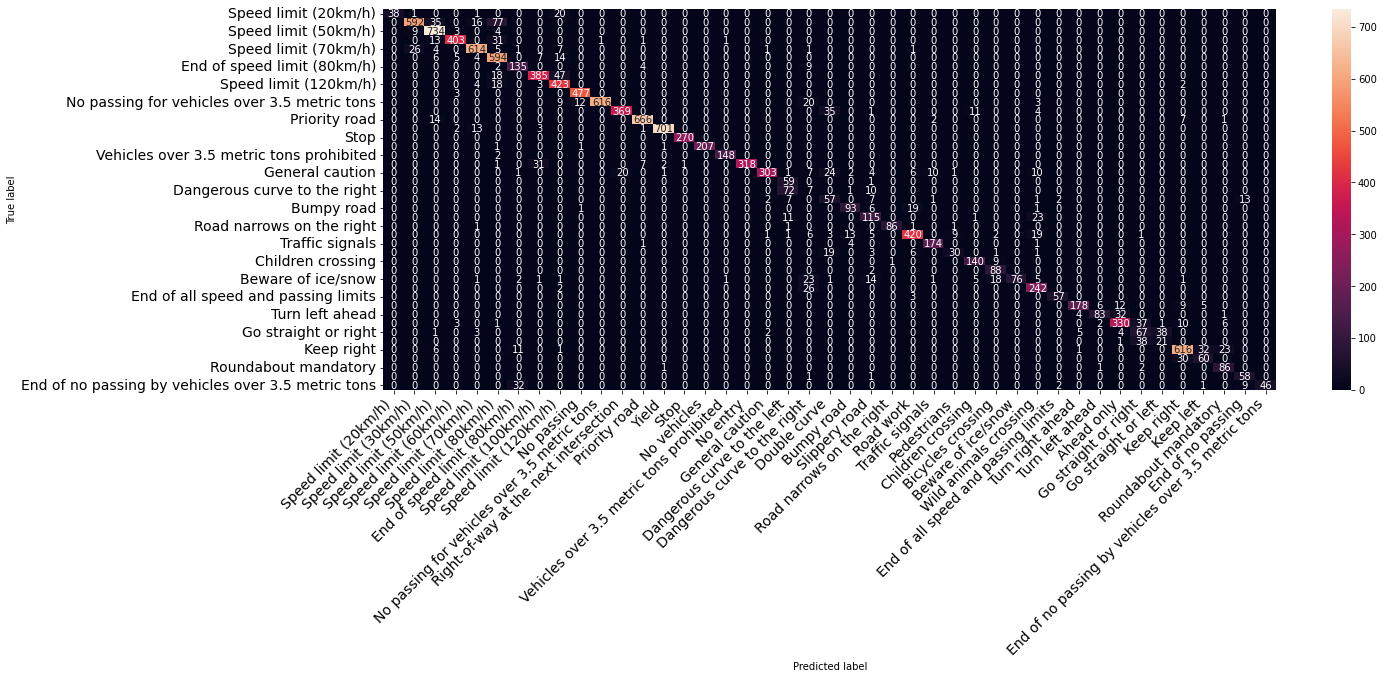

In [ ]:
confusion_matrix(c_matrix, class_names, figsize = (20,7), fontsize=14)

## Model 2

### Init model

Thử với opt là Adam và learning rate=0.001

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
def init_model():
  model = Sequential()
  
  #block1
  model.add(Conv2D(32, (3, 3), padding="same", input_shape=shape))
  model.add(Activation("relu"))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  #block2
  model.add(Conv2D(64, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())

  model.add(Dense(512))
  model.add(Activation("relu"))
  model.add(BatchNormalization())

  model.add(Dense(classes))

  model.add(Activation("softmax"))
  
  #Compile Model
  model.compile(Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])  
  return model

In [ ]:
model_2 = init_model()
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### Start train

In [ ]:
# history_2 = model_2.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), 
#                           steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
543/543 [==============================] - 51s 88ms/step - loss: 1.5040 - accuracy: 0.5568 - val_loss: 1.6665 - val_accuracy: 0.5553
Epoch 2/10
543/543 [==============================] - 33s 61ms/step - loss: 0.4704 - accuracy: 0.8473 - val_loss: 0.8008 - val_accuracy: 0.7655
Epoch 3/10
543/543 [==============================] - 32s 60ms/step - loss: 0.1931 - accuracy: 0.9393 - val_loss: 0.6271 - val_accuracy: 0.8365
Epoch 4/10
543/543 [==============================] - 33s 60ms/step - loss: 0.1336 - accuracy: 0.9574 - val_loss: 0.4976 - val_accuracy: 0.8628
Epoch 5/10
543/543 [==============================] - 35s 64ms/step - loss: 0.1004 - accuracy: 0.9670 - val_loss: 0.4810 - val_accuracy: 0.8850
Epoch 6/10
543/543 [==============================] - 33s 61ms/step - loss: 0.0898 - accuracy: 0.9708 - val_loss: 0.4439 - val_accuracy: 0.8832
Epoch 7/10
543/543 [==============================] - 33s 61ms/step - loss: 0.0849 - accuracy: 0.9720 - val_loss: 0.5036 - val_accuracy:

In [ ]:
cd /content/gdrive/MyDrive/BTL_ML/saved_model/model_2

/content/gdrive/.shortcut-targets-by-id/1jtwQ01KKNN4OXDf7MeivMACQRgfTwAWd/BTL_ML/saved_model/model_2


In [ ]:
#model_2.save("model_2.h5")

In [ ]:
# np.save('history_model_2.npy', history_2.history)

### Plot loss and acc

In [ ]:
saved_model_2 = tf.keras.models.load_model("model_2.h5")

In [ ]:
saved_history_model_2 = np.load('history_model_2.npy',allow_pickle='TRUE').item()

In [ ]:
def plot_model_history(saved_history_model, acc='accuracy', val_acc='val_accuracy'):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(range(1, len(saved_history_model[acc]) + 1), saved_history_model[acc])
    axs[0].plot(range(1, len(saved_history_model[val_acc]) + 1), saved_history_model[val_acc])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1, len(saved_history_model[acc]) + 1), len(saved_history_model[acc]) / 10)
    axs[0].legend(['train', 'val'], loc='best')

    axs[1].plot(range(1, len(saved_history_model['loss']) + 1), saved_history_model['loss'])
    axs[1].plot(range(1, len(saved_history_model['val_loss']) + 1), saved_history_model['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1, len(saved_history_model['loss']) + 1), len(saved_history_model['loss']) / 10)
    axs[1].legend(['train', 'val'], loc='best')
    
    plt.show()
    plt.savefig('roc.png')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


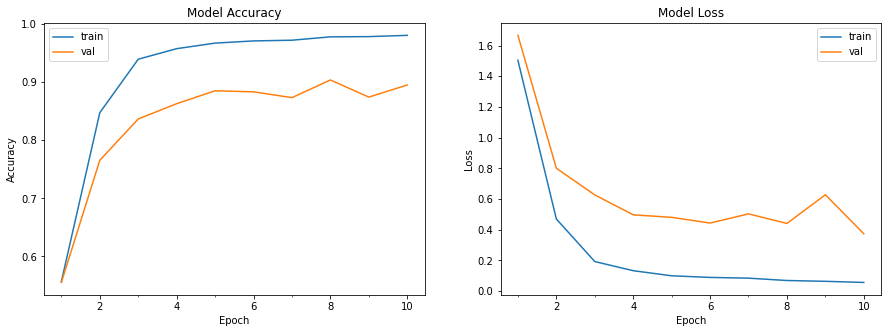

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_model_history(saved_history_model_2)

### Evaluation

Đánh giá trên tập test

In [ ]:
score_model_2 = saved_model_2.evaluate(testX, testY, verbose=1)

395/395 [==============================] - 3s 8ms/step - loss: 0.5291 - accuracy: 0.8850


In [ ]:
print('Test Score:', score_model_2[0])
print('Test Accuracy:', score_model_2[1])

Test Score: 0.5291222333908081
Test Accuracy: 0.8849564790725708


### Predict

In [ ]:
model_2_predY_hat = saved_model_2.predict(testX)
model_2_predY = np.argmax(model_2_predY_hat, axis=1)

### Đánh giá các thông số Precision , Recall và F Score

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [ ]:
def show_performance(predY_hat, predY):
  # Tính accuracy: (tp + tn) / (p + n)
  accuracy = accuracy_score(testY_label, predY)
  print('Accuracy: %f' % accuracy)
  # Tính precision tp / (tp + fp)
  precision = precision_score(testY_label, predY, average='macro')
  print('Precision: %f' % precision)
  # Tính recall: tp / (tp + fn)
  recall = recall_score(testY_label, predY, average='macro')
  print('Recall: %f' % recall)
  # Tính f1: 2 tp / (2 tp + fp + fn)
  f1 = f1_score(testY_label, predY, average='macro')
  print('F1 score: %f' % f1)
  # Tính Area under ROC
  auc = roc_auc_score(testY, predY_hat, multi_class='ovr')
  print('ROC AUC: %f' % auc)



In [ ]:
show_performance(model_2_predY_hat, model_2_predY)

Accuracy: 0.884956
Precision: 0.839330
Recall: 0.814393
F1 score: 0.798708
ROC AUC: 0.995307


### Xây dựng confusion matrix

In [ ]:
model_2_c_matrix = metrics.confusion_matrix(testY_label, model_2_predY)

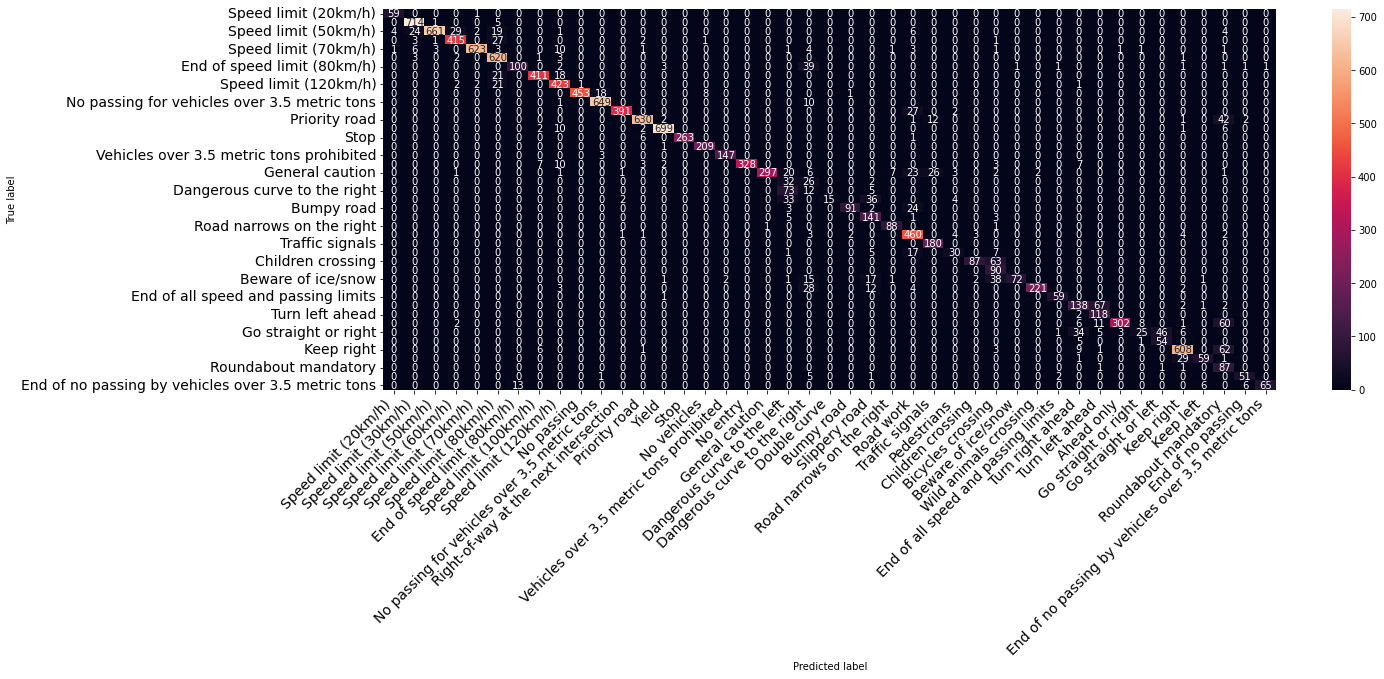

In [ ]:
confusion_matrix(model_2_c_matrix, class_names, figsize = (20,7), fontsize=14)

# Optimize

In [ ]:
i = []
while (True):
   i.append('a')

## Model 2 

### Tune Batch Size and Number of Epochs

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# create model
model_2_opt = KerasClassifier(build_fn=init_model, verbose=1)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model_2_opt, param_grid=param_grid, n_jobs=None, cv=3)
grid_result = grid.fit(trainX, trainY)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
2320/2320 [==============================] - 27s 11ms/step - loss: 0.3846 - accuracy: 0.8975
Epoch 2/10
2320/2320 [==============================] - 24s 10ms/step - loss: 0.0828 - accuracy: 0.9756
Epoch 3/10
2320/2320 [==============================] - 24s 11ms/step - loss: 0.0717 - accuracy: 0.9790
Epoch 4/10
2320/2320 [==============================] - 24s 10ms/step - loss: 0.0389 - accuracy: 0.9876
Epoch 5/10
2320/2320 [==============================] - 23s 10ms/step - loss: 0.0494 - accuracy: 0.9862
Epoch 6/10
2320/2320 [==============================] - 23s 10ms/step - loss: 0.0272 - accuracy: 0.9915
Epoch 7/10
2320/2320 [==============================] - 23s 10ms/step - loss: 0.0301 - accuracy: 0.9907
Epoch 8/10
2320/2320 [==============================] - 26s 11ms/step - loss: 0.0252 - accuracy: 0.9923
Epoch 9/10
2320/2320 [==============================] - 25s 11ms/step - loss: 0.0218 - accuracy: 0.9934
Epoch 10/10
1160/1160 [==============================] - 6s 5ms/

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
2320/2320 [==============================] - 27s 11ms/step - loss: 0.4417 - accuracy: 0.8789
Epoch 2/10
2320/2320 [==============================] - 26s 11ms/step - loss: 0.0925 - accuracy: 0.9735
Epoch 3/10
2320/2320 [==============================] - 26s 11ms/step - loss: 0.0729 - accuracy: 0.9776
Epoch 4/10
2320/2320 [==============================] - 25s 11ms/step - loss: 0.0517 - accuracy: 0.9845
Epoch 5/10
2320/2320 [==============================] - 25s 11ms/step - loss: 0.0477 - accuracy: 0.9850
Epoch 6/10
2320/2320 [==============================] - 25s 11ms/step - loss: 0.0397 - accuracy: 0.9884
Epoch 7/10
2320/2320 [==============================] - 25s 11ms/step - loss: 0.0180 - accuracy: 0.9941
Epoch 8/10
2320/2320 [==============================] - 25s 11ms/step - loss: 0.0340 - accuracy: 0.9899
Epoch 9/10
2320/2320 [==============================] - 25s 11ms/step - loss: 0.0267 - accuracy: 0.9926
Epoch 10/10
1160/1160 [==============================] - 6s 5ms/

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
2320/2320 [==============================] - 26s 11ms/step - loss: 0.3993 - accuracy: 0.8910
Epoch 2/10
2320/2320 [==============================] - 25s 11ms/step - loss: 0.0957 - accuracy: 0.9706
Epoch 3/10
2320/2320 [==============================] - 24s 10ms/step - loss: 0.0759 - accuracy: 0.9779
Epoch 4/10
2320/2320 [==============================] - 24s 10ms/step - loss: 0.0687 - accuracy: 0.9815
Epoch 5/10
2320/2320 [==============================] - 24s 11ms/step - loss: 0.0250 - accuracy: 0.9915
Epoch 6/10
2320/2320 [==============================] - 24s 10ms/step - loss: 0.0309 - accuracy: 0.9902
Epoch 7/10
2320/2320 [==============================] - 24s 10ms/step - loss: 0.0424 - accuracy: 0.9871
Epoch 8/10
2320/2320 [==============================] - 25s 11ms/step - loss: 0.0308 - accuracy: 0.9904
Epoch 9/10
2320/2320 [==============================] - 24s 10ms/step - loss: 0.0231 - accuracy: 0.9937
Epoch 10/10
1160/1160 [==============================] - 7s 6ms/

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
2320/2320 [==============================] - 26s 11ms/step - loss: 0.4055 - accuracy: 0.8909
Epoch 2/50
2320/2320 [==============================] - 25s 11ms/step - loss: 0.0732 - accuracy: 0.9791
Epoch 3/50
2320/2320 [==============================] - 25s 11ms/step - loss: 0.0517 - accuracy: 0.9847
Epoch 4/50
2320/2320 [==============================] - 25s 11ms/step - loss: 0.0495 - accuracy: 0.9860
Epoch 5/50
2320/2320 [==============================] - 26s 11ms/step - loss: 0.0302 - accuracy: 0.9911
Epoch 6/50
2320/2320 [==============================] - 26s 11ms/step - loss: 0.0478 - accuracy: 0.9867
Epoch 7/50
2320/2320 [==============================] - 26s 11ms/step - loss: 0.0247 - accuracy: 0.9924
Epoch 8/50
2320/2320 [==============================] - 26s 11ms/step - loss: 0.0202 - accuracy: 0.9933
Epoch 9/50
2320/2320 [==============================] - 27s 11ms/step - loss: 0.0234 - accuracy: 0.9931
Epoch 10/50
2320/2320 [==============================] - 27s 11m

In [ ]:
import joblib

#save your model or results
joblib.dump(gs, 'model_2_opt_batch_size_epochs.pkl')

#load your model for further usage
joblib.load("model_2_opt_batch_size_epochs.pkl")